# Data Wrangling and Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_weather = pd.read_csv('data/weather.csv')         #import in weather dataset
raw_weather.head()                                    

station_nbr        date tmax tmin tavg depart dewpoint wetbulb heat cool  \
0            1  2012-01-01   52   31   42      M       36      40   23    0   
1            2  2012-01-01   48   33   41     16       37      39   24    0   
2            3  2012-01-01   55   34   45      9       24      36   20    0   
3            4  2012-01-01   63   47   55      4       28      43   10    0   
4            6  2012-01-01   63   34   49      0       31      43   16    0   

  sunrise sunset     codesum snowfall preciptotal stnpressure sealevel  \
0       -      -  RA FZFG BR        M        0.05       29.78    29.92   
1    0716   1626          RA      0.0        0.07       28.82    29.91   
2    0735   1720                  0.0        0.00       29.77    30.47   
3    0728   1742                  0.0        0.00       29.79    30.48   
4    0727   1742                  0.0        0.00       29.95    30.47   

  resultspeed resultdir avgspeed  
0         3.6        20      4.6  
1         9.1        23     11.3  
2         9.9        31     10.0  
3         8.0        35      8.2  
4        14.0        36     13.8

Looking at the raw weather data, I believe that the most important information to extract and clean for each station would be the average daily temperature and the daily total precipitation. If the daily average temperature is less than 32F, and with precipitation, we can conclude that there was winter weather present. Precipitation over 1.00 inches will be considered extreme enough for the scope of the project.

In [3]:
weather_df = raw_weather[['station_nbr','date','tavg','preciptotal']]   #extract only temp and precip data for each station
weather_df.sort_values(by=['station_nbr', 'date'])     

station_nbr        date tavg preciptotal
0                1  2012-01-01   42        0.05
19               1  2012-01-02   41        0.01
38               1  2012-01-03   22        0.00
57               1  2012-01-04   19        0.00
76               1  2012-01-05   32        0.00
95               1  2012-01-06   36           T
114              1  2012-01-07   43        0.00
133              1  2012-01-08   36        0.00
152              1  2012-01-09   31        0.00
171              1  2012-01-10   38           T
190              1  2012-01-11   32        0.00
209              1  2012-01-12   36        0.69
228              1  2012-01-13   40        0.02
247              1  2012-01-14   25        0.00
266              1  2012-01-15   10        0.00
285              1  2012-01-16   20        0.05
304              1  2012-01-17   39        0.09
323              1  2012-01-18   35           T
342              1  2012-01-19   22        0.02
361              1  2012-01-20   25        0.08
380              1  2012-01-21   17        0.12
399              1  2012-01-22   18           T
418              1  2012-01-23   38        0.12
437              1  2012-01-24   48           T
456              1  2012-01-25   39        0.00
475              1  2012-01-26   38        0.15
494              1  2012-01-27   40        1.14
513              1  2012-01-28   40        0.00
532              1  2012-01-29   37        0.00
551              1  2012-01-30   32           T
...            ...         ...  ...         ...
19936           20  2014-10-02   80        0.47
19956           20  2014-10-03   71        0.00
19976           20  2014-10-04   64        0.00
19996           20  2014-10-05   74        0.00
20016           20  2014-10-06   76        0.16
20036           20  2014-10-07   84        0.00
20056           20  2014-10-08   83        0.00
20076           20  2014-10-09   85        0.00
20096           20  2014-10-10   80        0.55
20116           20  2014-10-11   60        0.42
20136           20  2014-10-12   64           T
20156           20  2014-10-13   69        1.36
20176           20  2014-10-14   67        0.00
20196           20  2014-10-15   67        0.00
20216           20  2014-10-16   74        0.00
20236           20  2014-10-17   75        0.00
20256           20  2014-10-18   75        0.00
20276           20  2014-10-19   68        0.00
20296           20  2014-10-20   70        0.00
20316           20  2014-10-21   69        0.00
20336           20  2014-10-22   71        0.00
20356           20  2014-10-23   72           T
20376           20  2014-10-24   73        0.00
20396           20  2014-10-25   77        0.00
20416           20  2014-10-26   79        0.00
20436           20  2014-10-27   76        0.00
20456           20  2014-10-28   74        0.00
20476           20  2014-10-29   67        0.00
20496           20  2014-10-30   66        0.00
20516           20  2014-10-31   59        0.00

[20517 rows x 4 columns]

After filtering and sorting the raw data, missing values and trace values (for precipitation) are apparent. Following careful consideration about how to best deal with missing values, I decided to remove any observations with any missing values. Also, trace precipitation values are going to be replaced with the value of 0.00, as their measurements are not significant enough in the scope the precipitation measurements.

In [4]:
stations = {}        #new dictionary consisting of stations as keys, and their respective weather dataframes as values
replacements = {'tavg' : {r'M' : np.nan},
                'preciptotal' : {r'T' : 0.00, r'M' : np.nan}}  #replace all missing values with NaN, precip traces as 0.00
clean_weather = weather_df.replace(replacements, regex=True)
clean_weather.dropna(inplace=True)   #eliminate any rows with missing values
for x in range(1,21):   #there are 20 stations included in the weather data
    stations['s{0}'.format(x)] = clean_weather.loc[weather_df.station_nbr == x]
    stations['s{0}'.format(x)].set_index('date', inplace=True)   #set index as date for each station's dataframe
    stations['s{0}'.format(x)] = stations['s{0}'.format(x)].apply(pd.to_numeric) #change the datatypes to numeric for plotting
stations['s5']

station_nbr  tavg  preciptotal
date                                      
2013-09-01            5    72         2.32
2013-09-02            5    73         0.43
2013-09-03            5    70         0.00
2013-09-04            5    68         0.00
2013-09-05            5    59         0.08
2013-09-06            5    57         0.00
2013-09-07            5    65         0.00
2013-09-08            5    62         0.00
2013-09-09            5    58         0.00
2013-09-10            5    65         0.03
2013-09-11            5    81         0.00
2013-09-12            5    76         0.47
2013-09-13            5    69         0.17
2013-09-14            5    60         0.00
2013-09-15            5    59         0.00
2013-09-16            5    56         0.02
2013-09-17            5    50         0.00
2013-09-18            5    60         0.00
2013-09-19            5    65         0.00
2013-09-20            5    66         0.00
2013-09-21            5    66         0.00
2013-09-22            5    60         0.39
2013-09-23            5    53         0.00
2013-09-24            5    53         0.00
2013-09-25            5    55         0.00
2013-09-26            5    58         0.00
2013-09-27            5    59         0.00
2013-09-28            5    61         0.00
2013-09-29            5    58         0.00
2013-09-30            5    58         0.00

So we have cleaned up weather data for each station. Some stations have very limited time-series data, some for only a month as seen above with station 5 data. Seeing this reinforced the previous decision to remove all observations with missing data. Now we have to consider where these stations are generally located by their temperature patterns. This is important to think about since winter weather in colder climates is seen as standard and less likely to cause grocery store rushes, compared to winter weather in warmer climates. Also, deviations from normal temperatures of the season should also be considered. Sudden temperature changes, especially around winter time, may also spur people to go to grocery stores. For each station, a rolling mean of the average temperature over 7 day periods will be plotted on top of the average temperature plot to be able to help visualize sudden temperature changes, along with a seperate plot of precipitation.

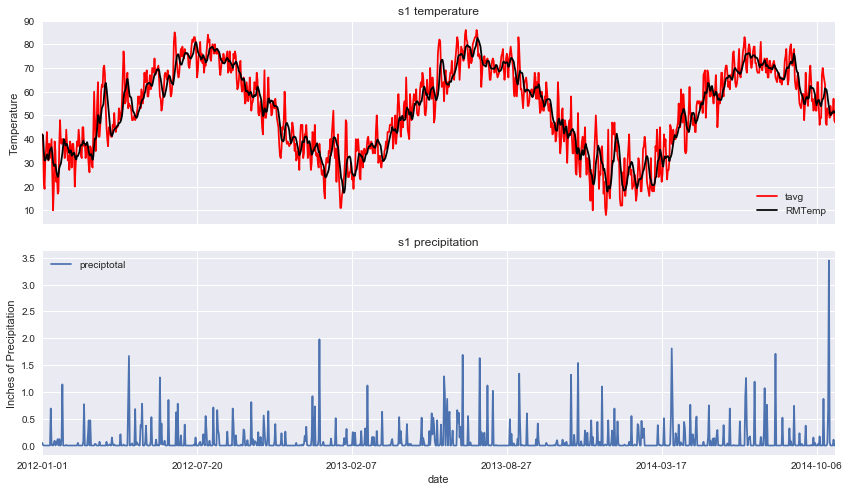

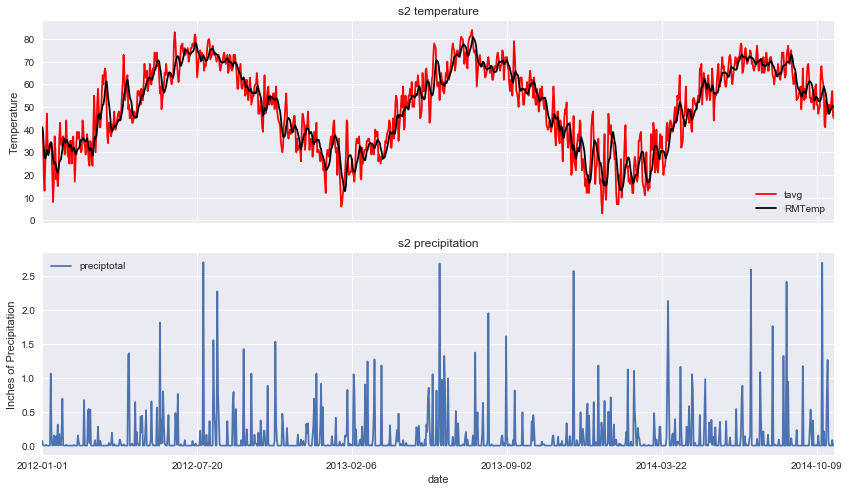

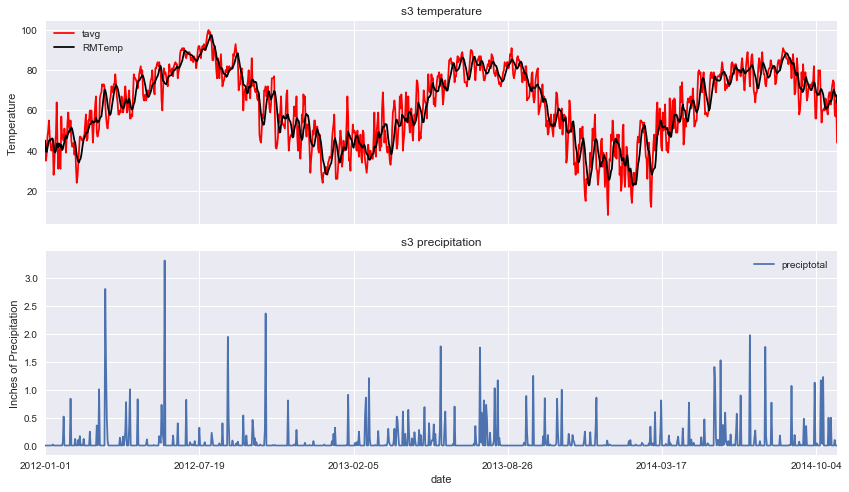

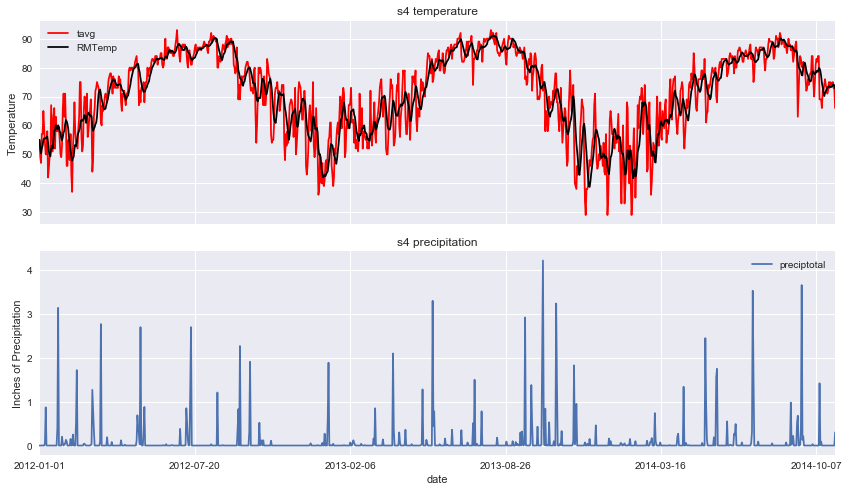

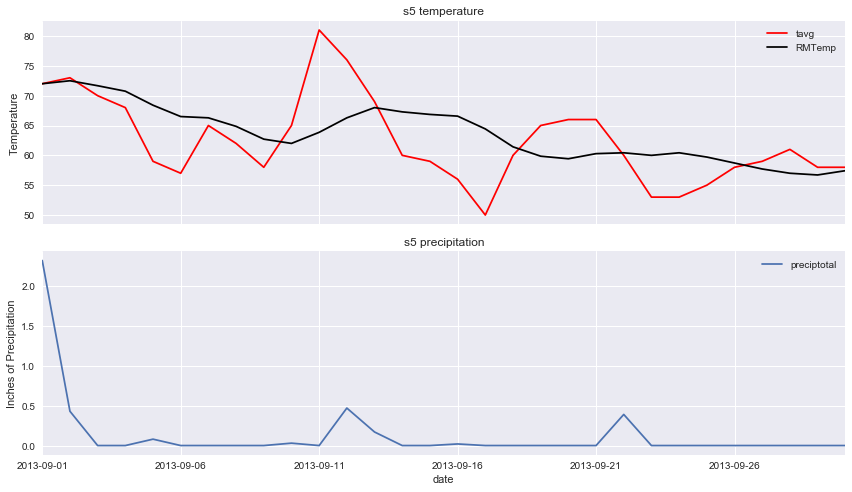

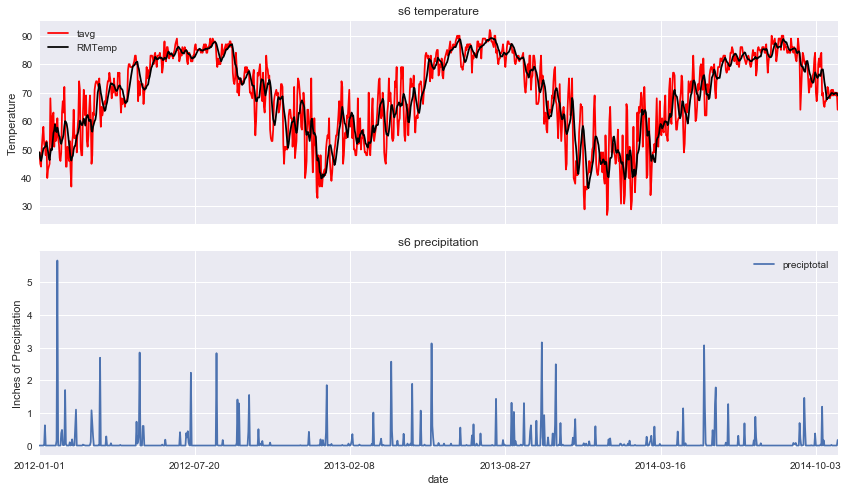

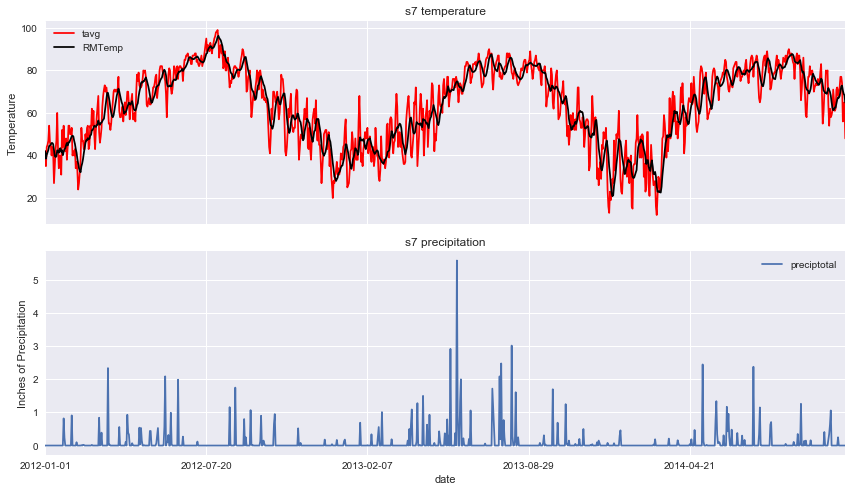

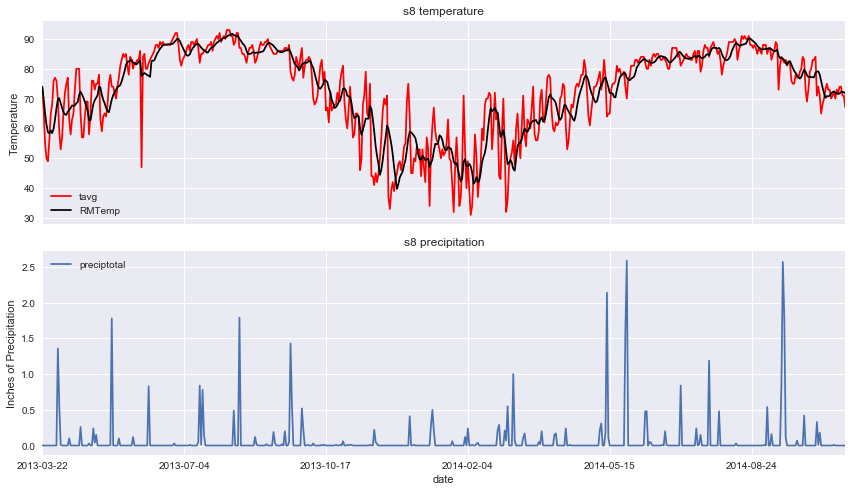

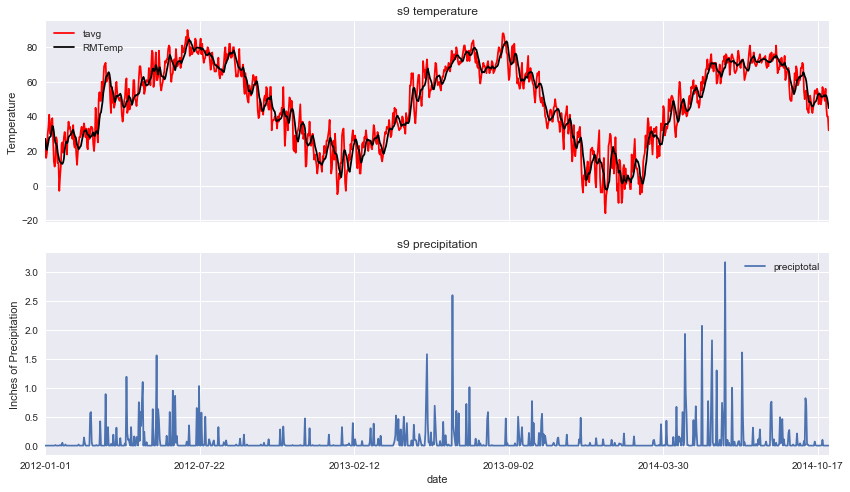

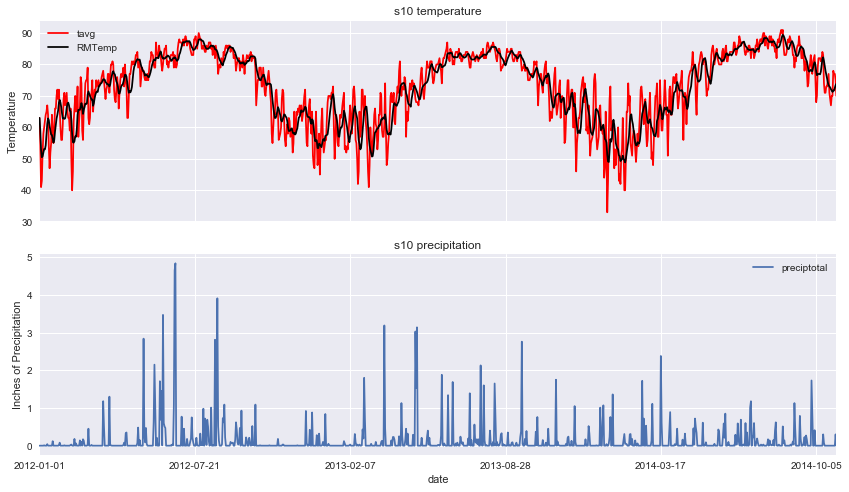

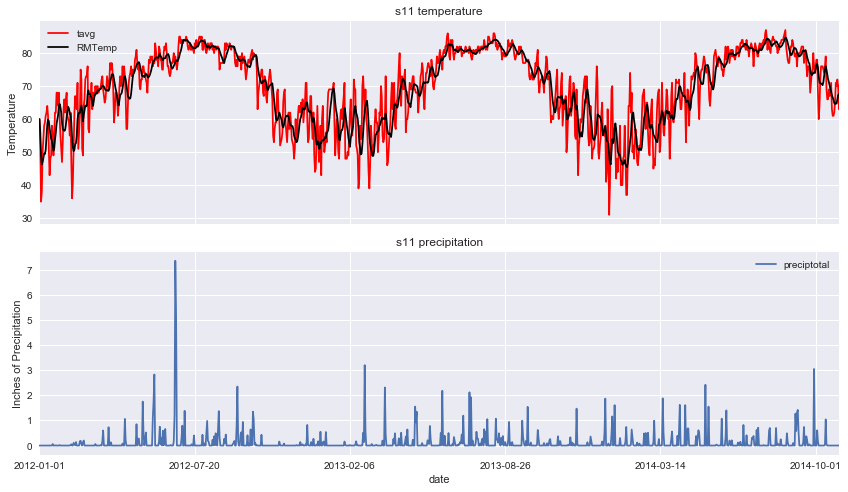

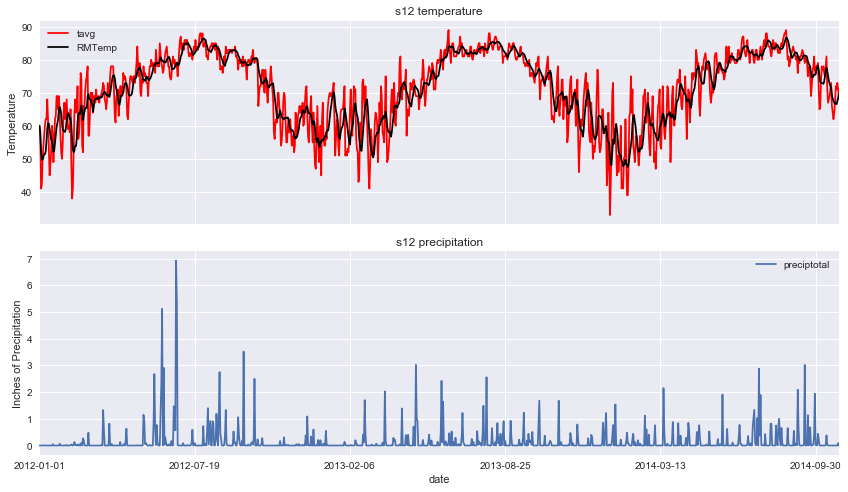

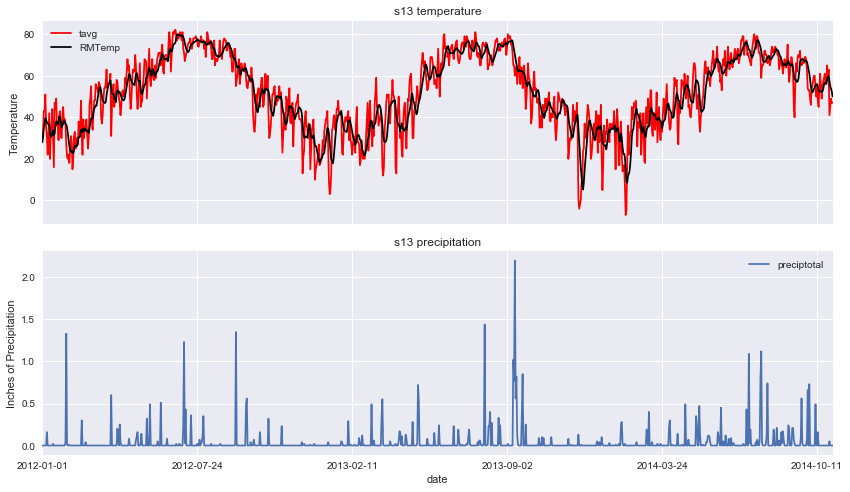

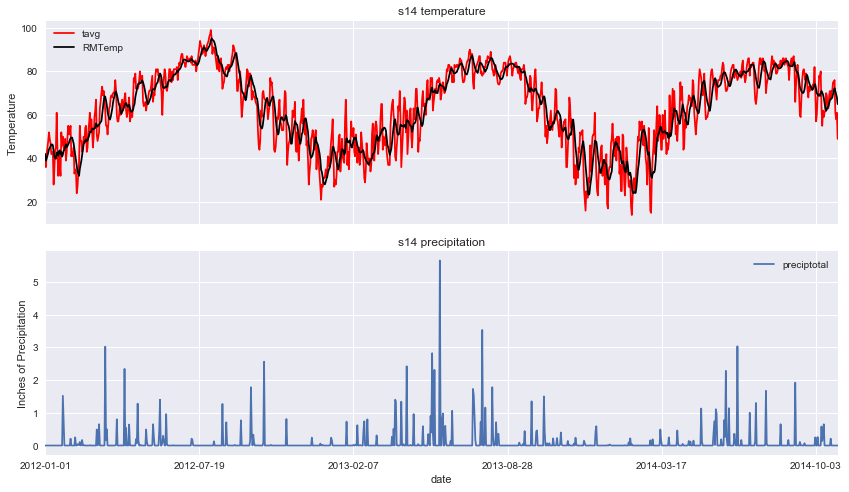

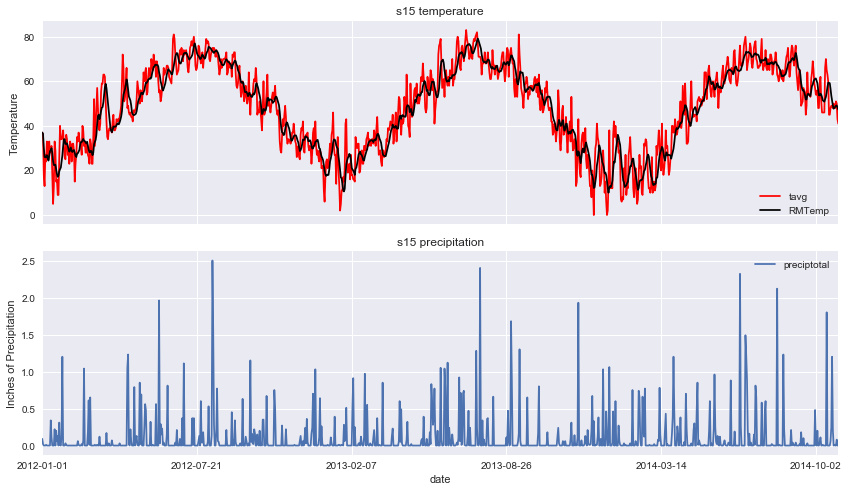

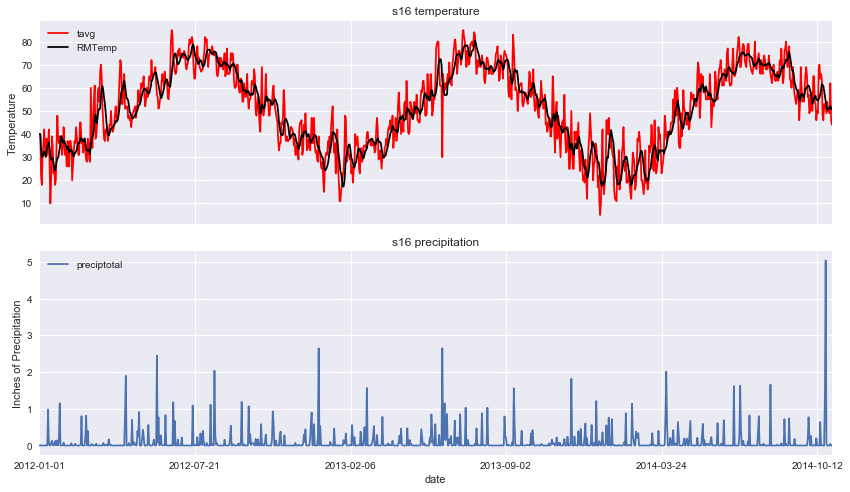

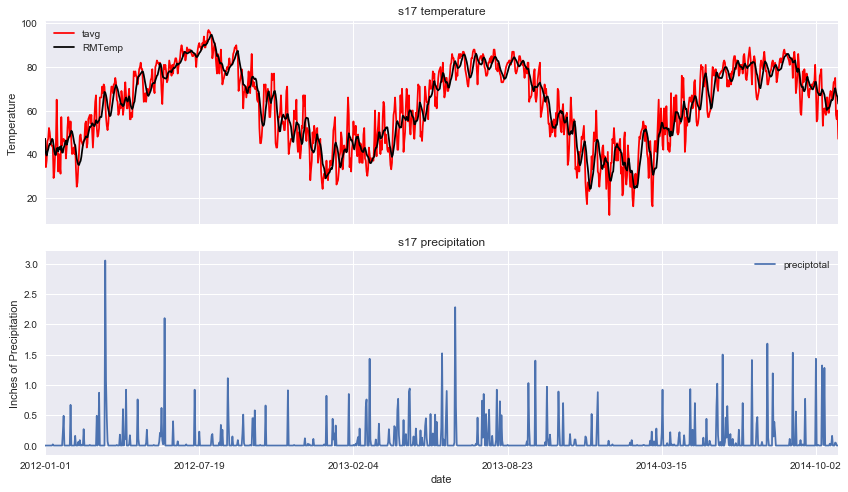

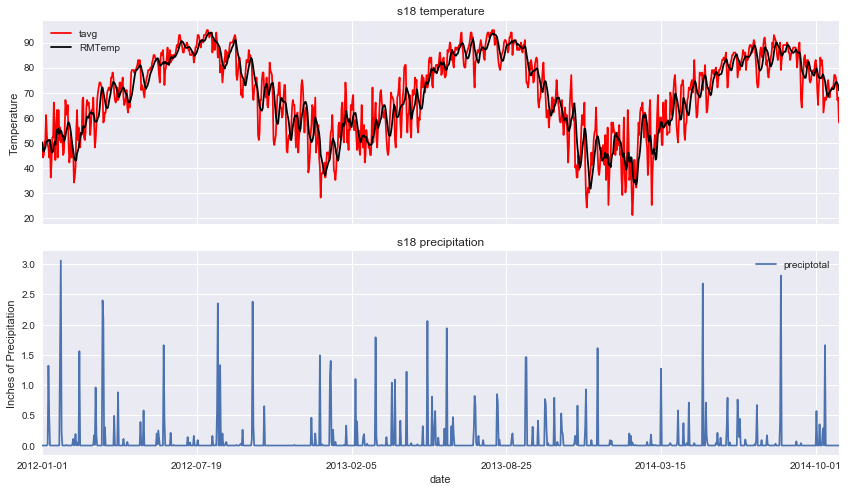

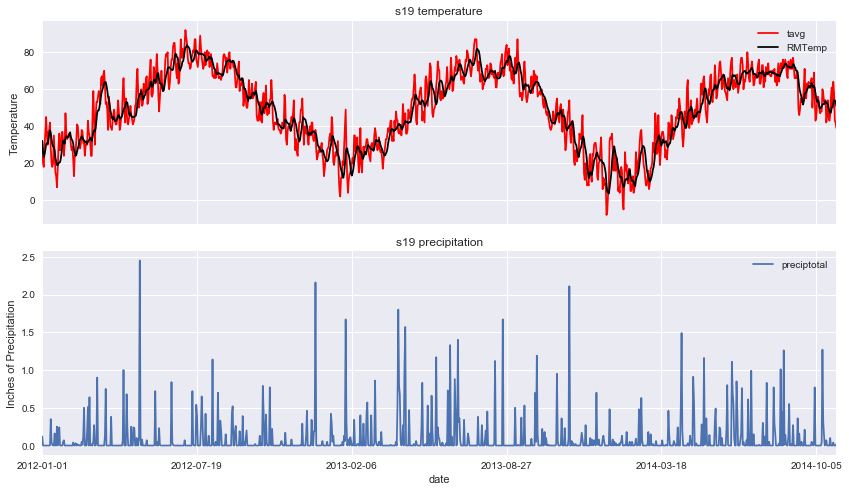

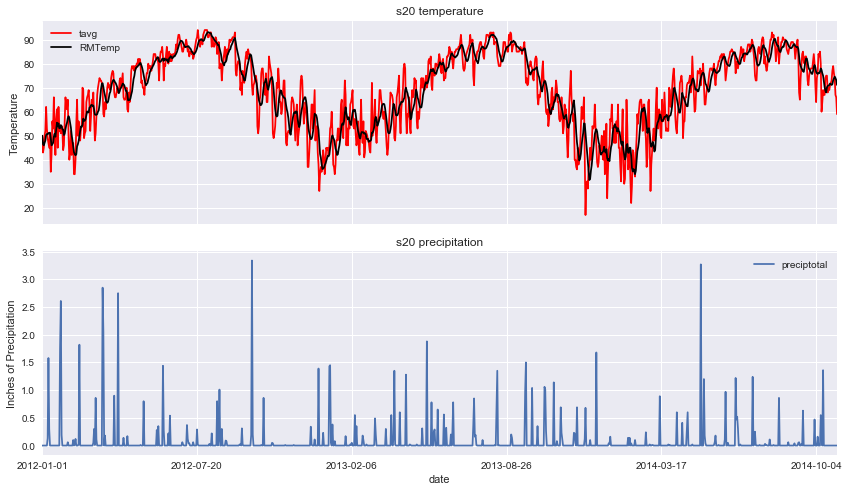

In [5]:
for station in stations.keys():
    fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(12,7)) #creates separate figures for each station, as well as separate axes for temperature and precipitation plots
    stations[station]['RMTemp'] = stations[station]['tavg'].rolling(7, min_periods=1).mean() #calcs rolling mean of temperatures for each station
    stations[station].plot(y='tavg', ax=axes[0], title=station + ' temperature', color='red') #plots temperature data
    stations[station].plot(y='RMTemp', ax=axes[0], color = 'black') #overlays rolling mean of temperature plot over temperature plot
    axes[0].set_ylabel('Temperature')
    stations[station].plot(y='preciptotal', ax=axes[1], title=station + ' precipitation') #plots precipitation on separate axes
    axes[1].set_ylabel('Inches of Precipitation')
    fig.tight_layout() #spaces axes within figures neatly 
plt.show()

Looking at the respective temperature and precipitation plots for each station, we can get an idea of what kind of weather each station is subject to. Some stations have mild winters, with little precipitation. Others have colder winters with large amounts of precipitation. To get a better idea of how frequent extreme temperature changes happen, let's create histograms to help visualize those counts.

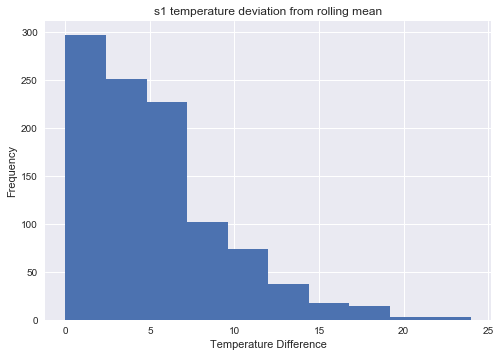

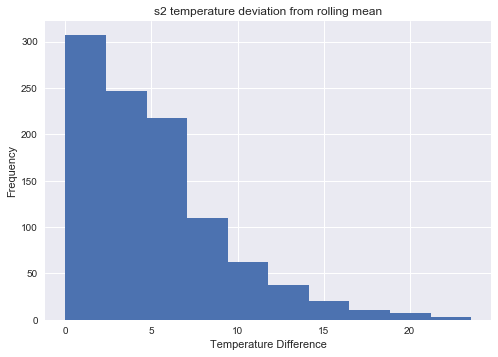

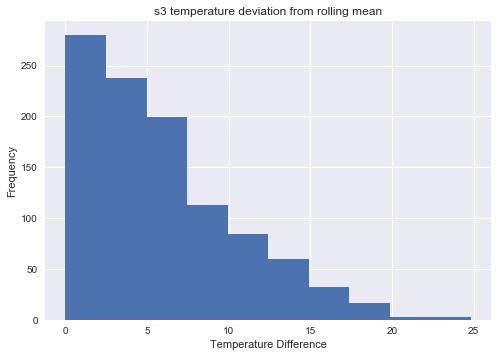

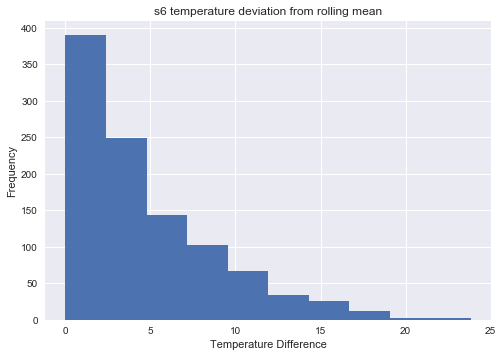

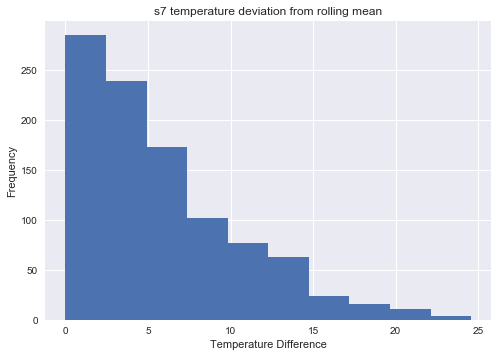

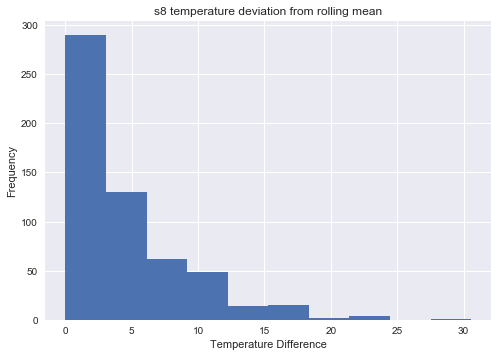

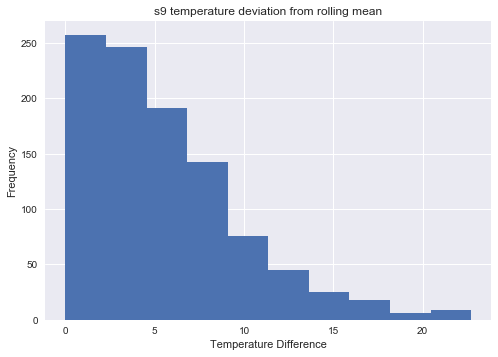

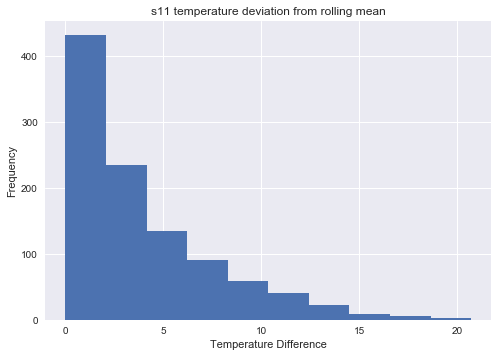

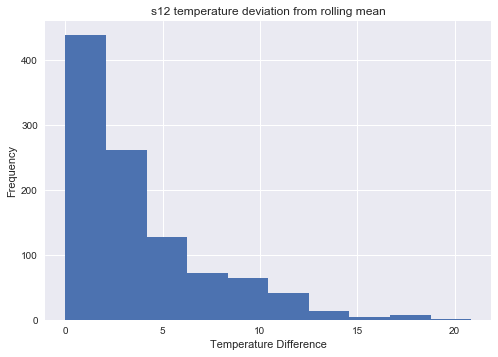

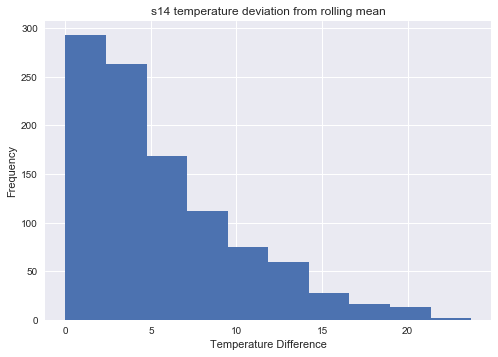

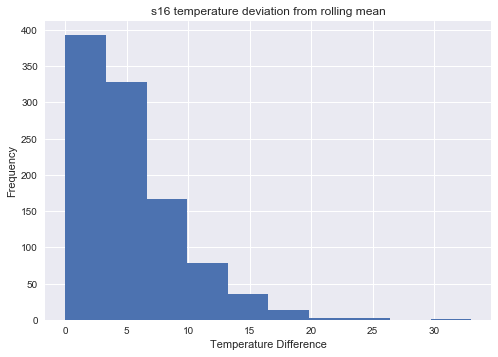

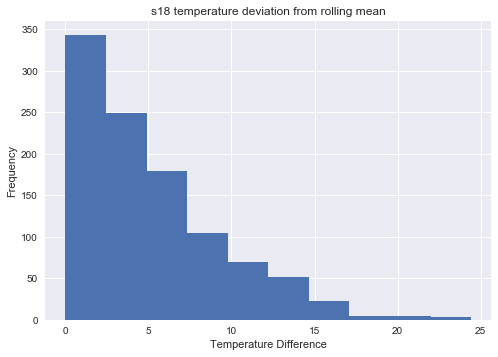

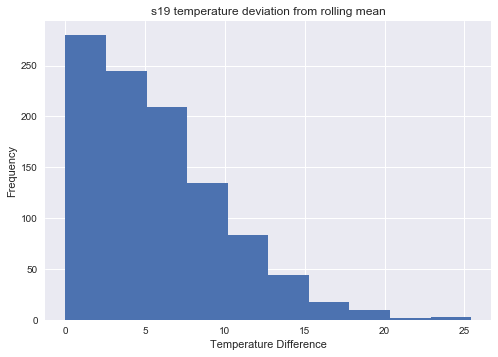

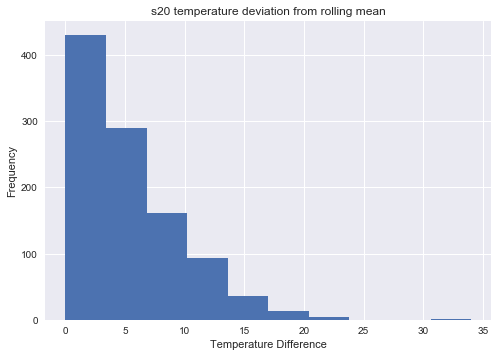

In [6]:
for station in stations.keys():
    stations[station]['TempAbsDiff'] = abs(stations[station]['tavg'] - stations[station]['RMTemp'])
    stations[station]['TempAbsDiff'].plot(kind='hist', bins=10)
    plt.title(station + ' temperature deviation from rolling mean')
    plt.xlabel('Temperature Difference')
    plt.show()

From these histograms, a temperature difference of 10 degrees from the rolling mean of each station seems to be an adequate difference to include in our future model. These temperature differences may occur at any point during the year, but could still affect sales of weather sensitive products. Next I will be looking at the sales data for each item at store 1 to determine any seasonal buying trends, based on frequency of sales through the year 2012.

/Users/vpatel/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


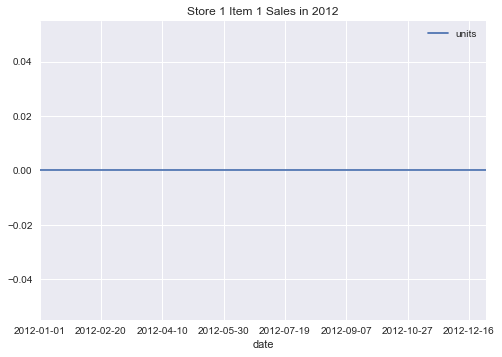

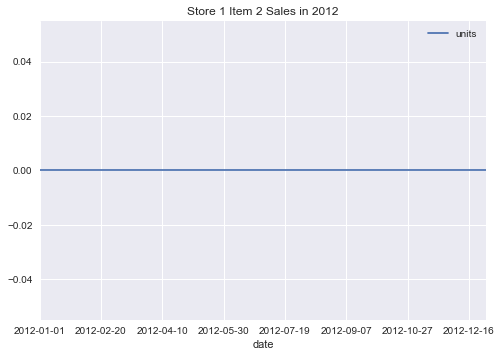

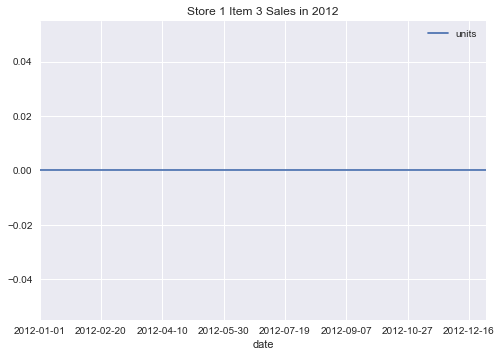

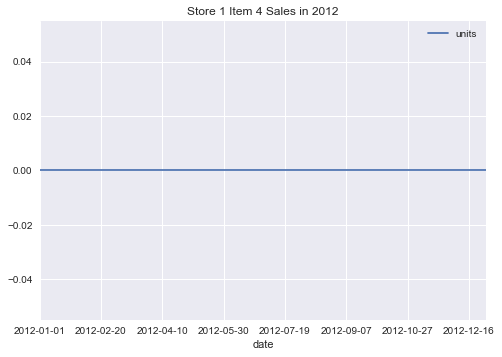

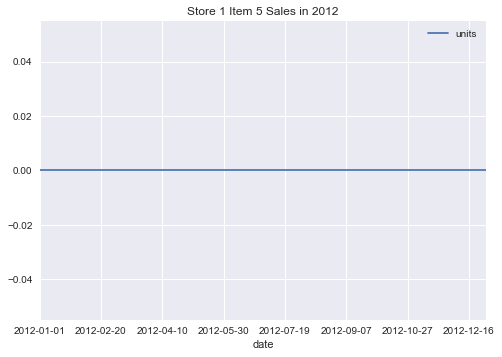

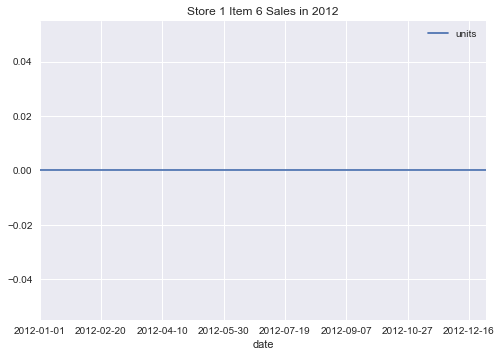

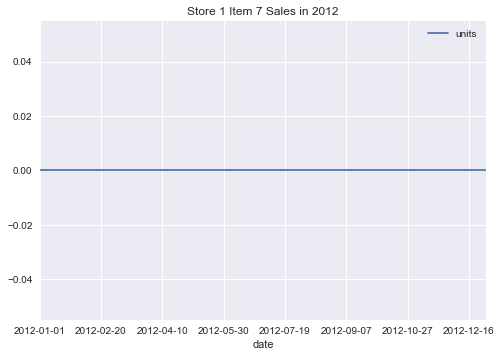

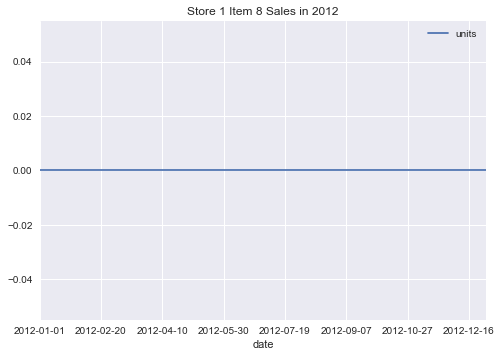

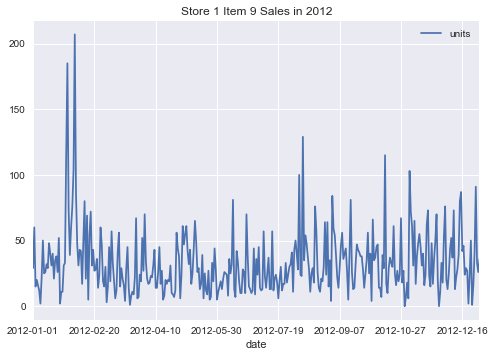

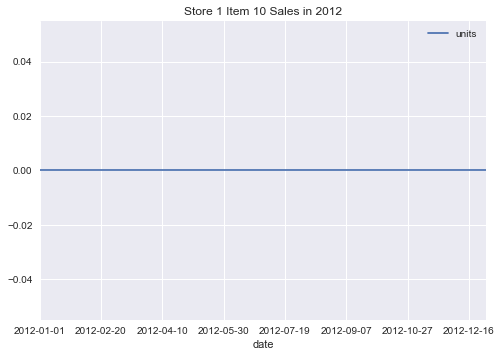

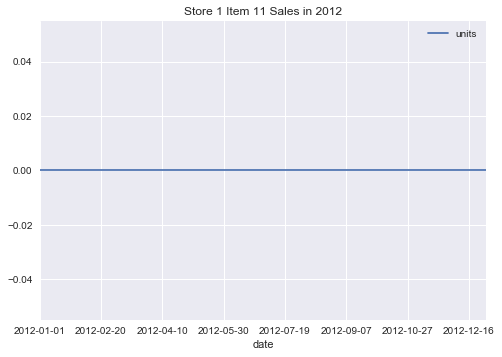

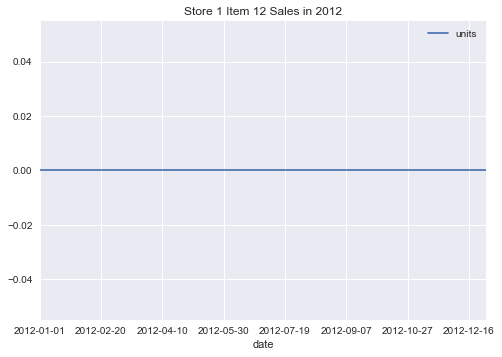

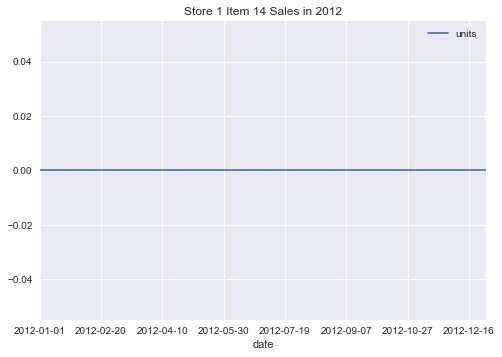

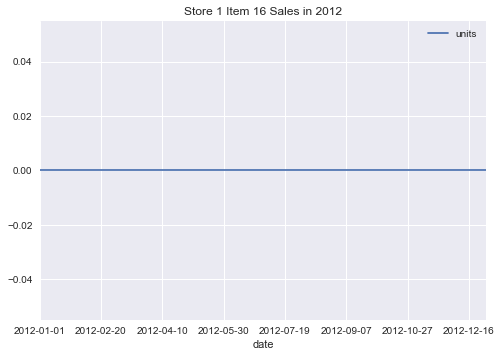

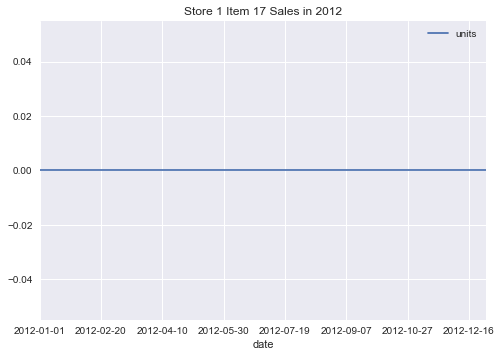

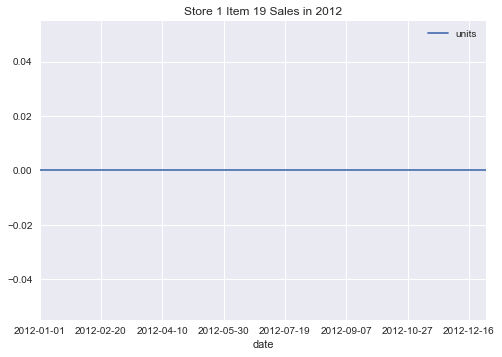

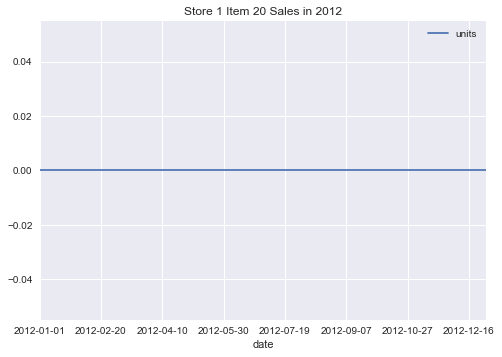

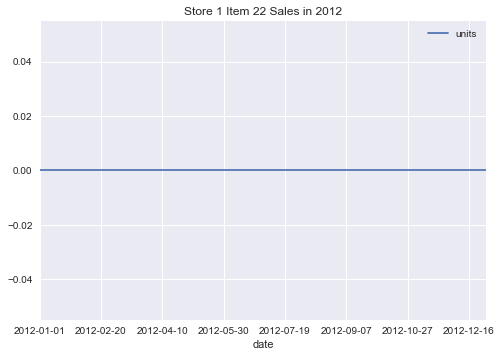

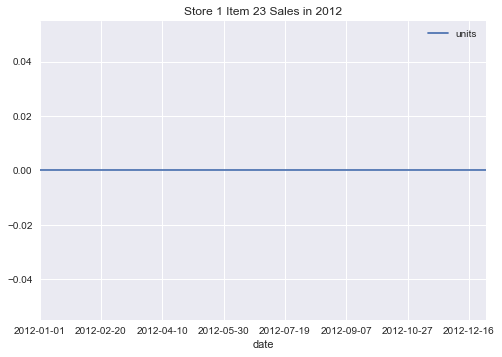

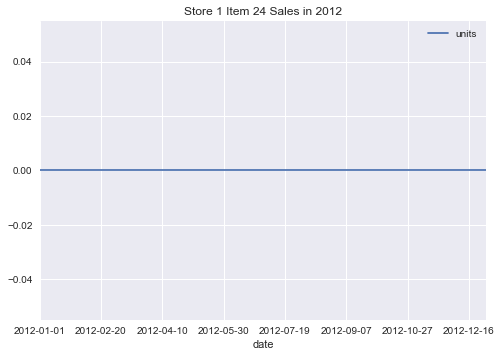

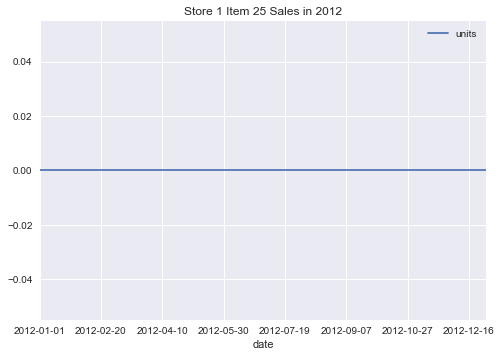

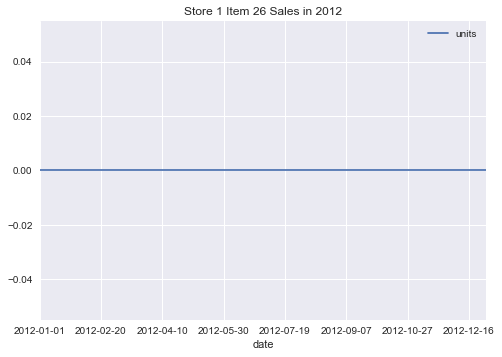

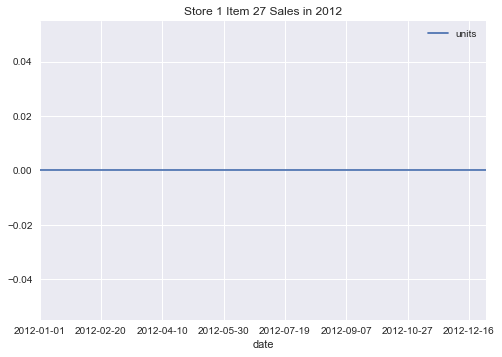

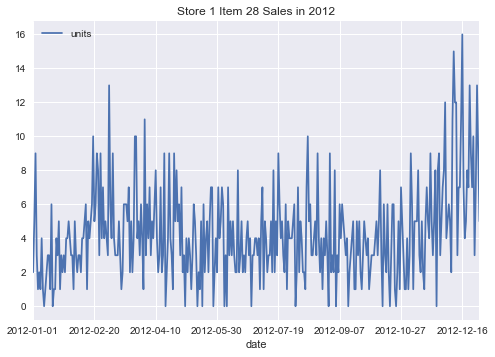

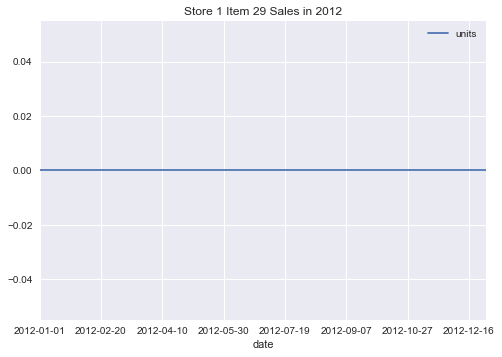

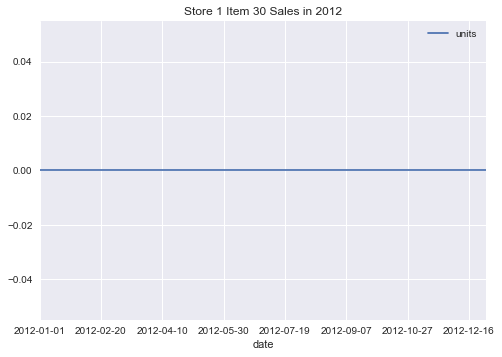

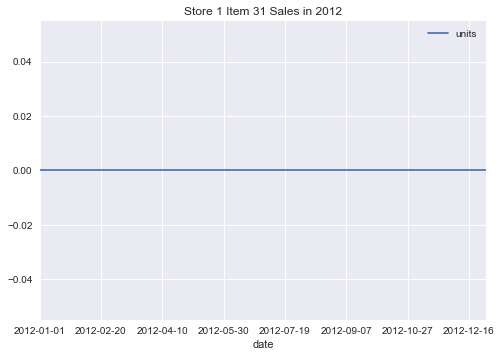

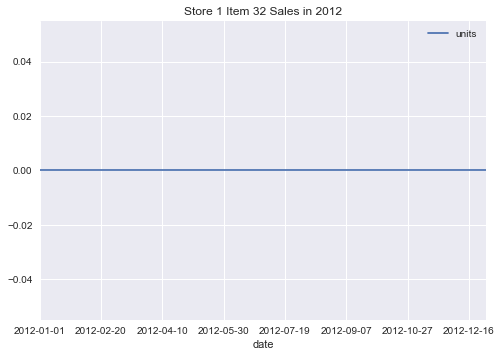

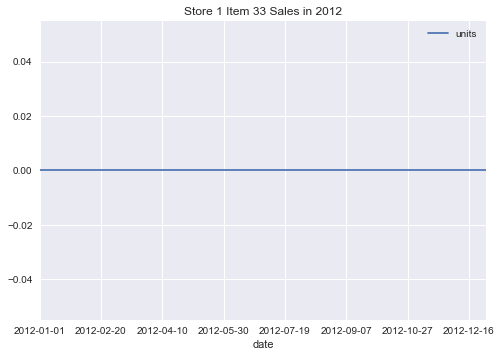

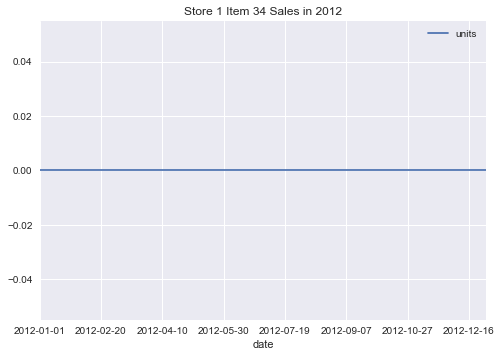

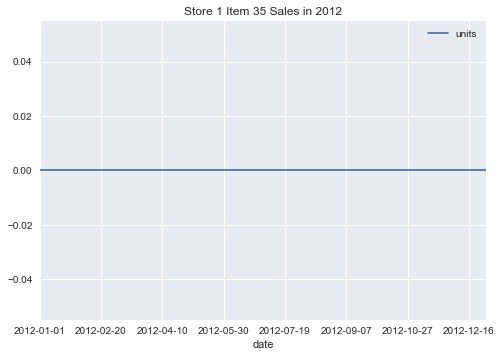

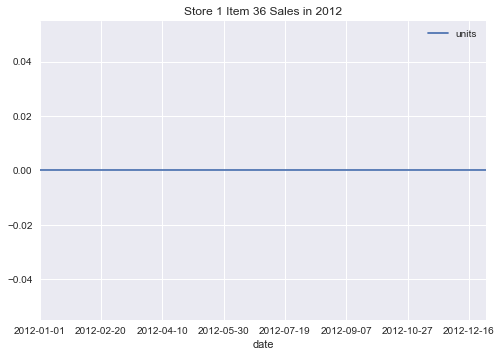

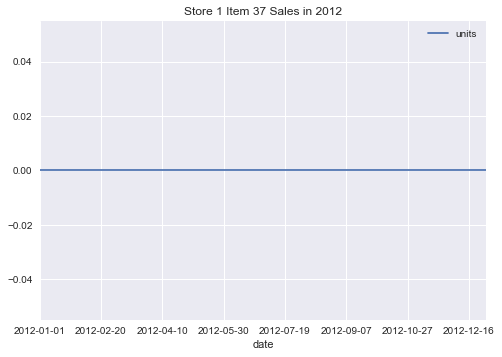

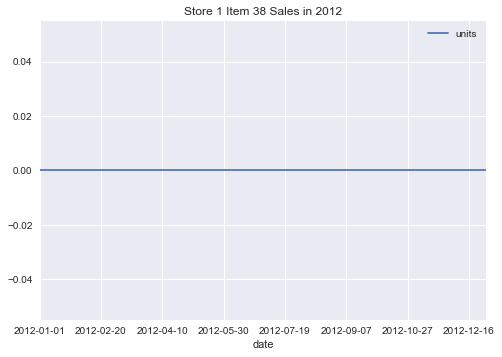

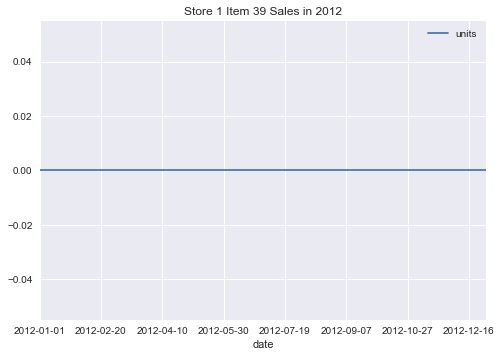

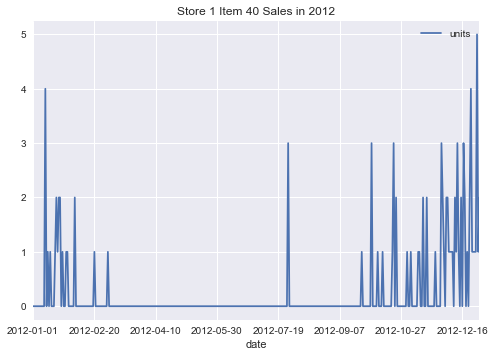

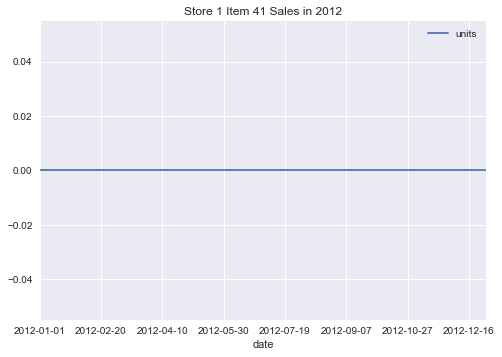

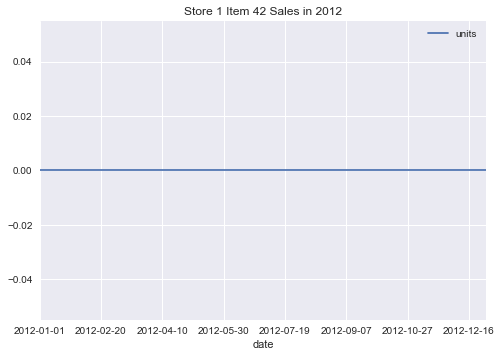

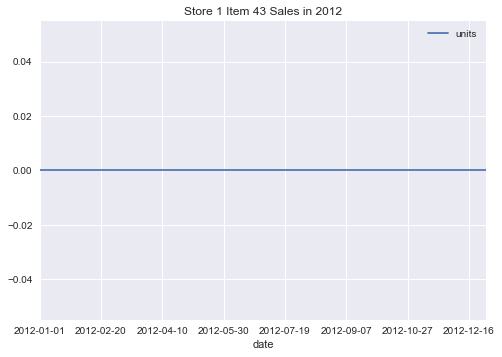

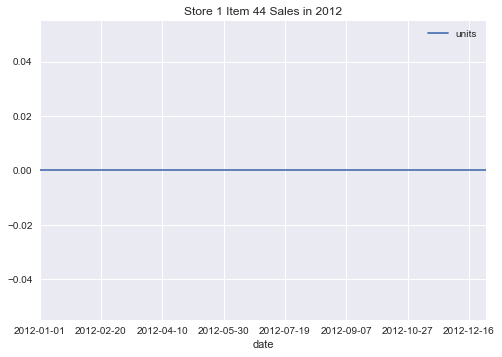

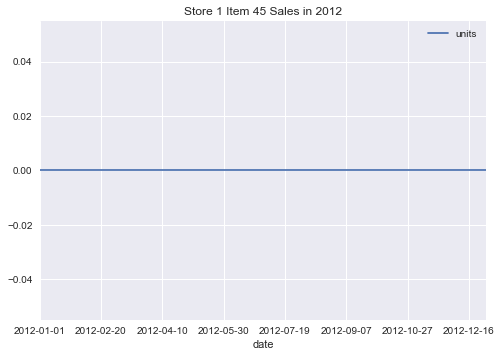

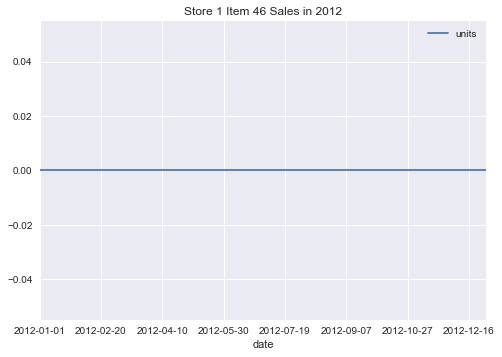

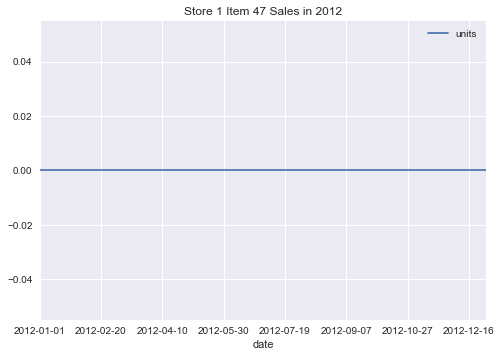

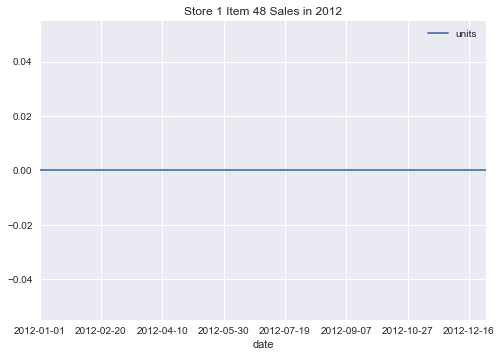

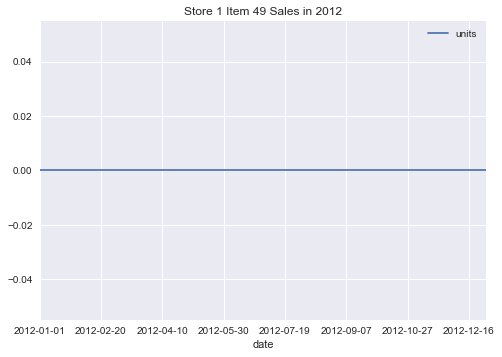

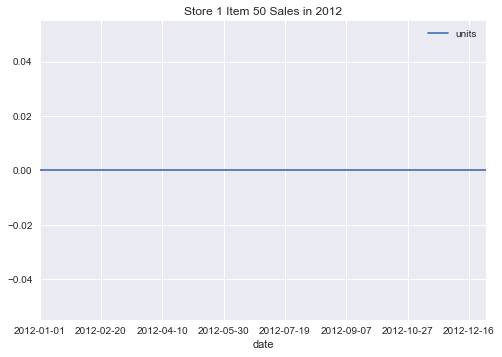

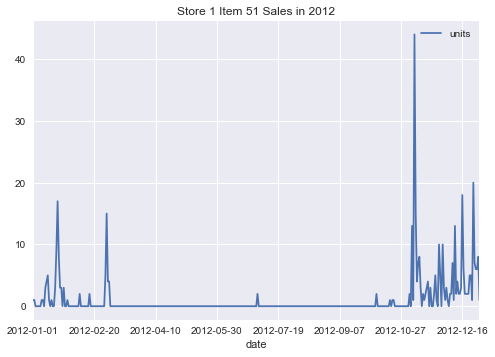

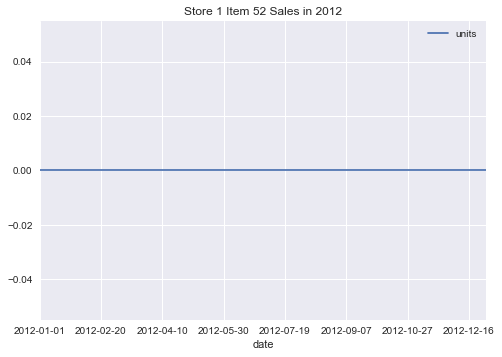

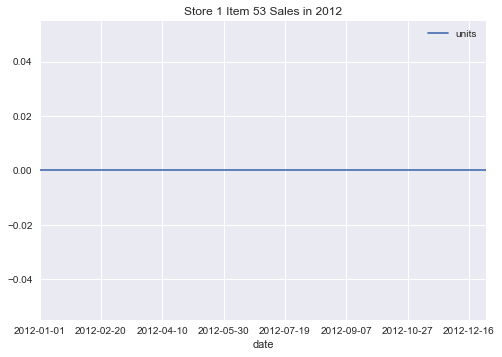

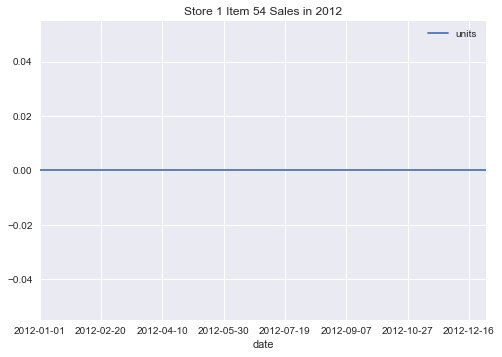

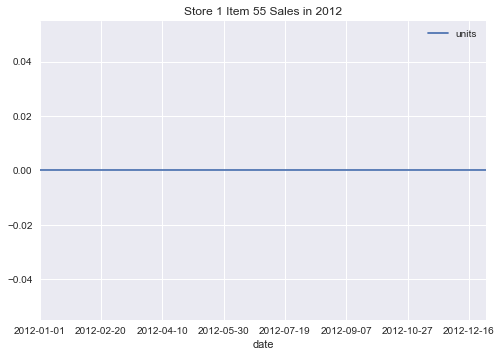

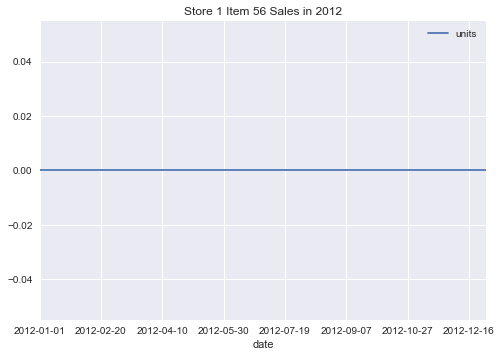

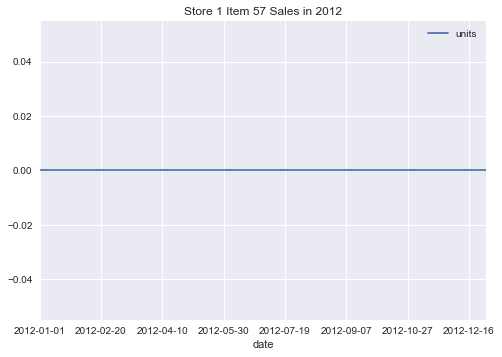

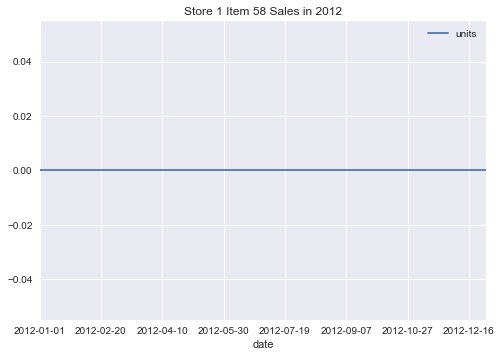

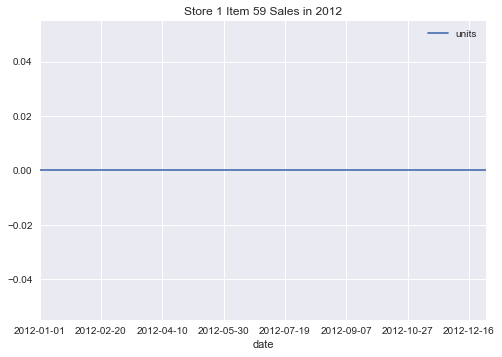

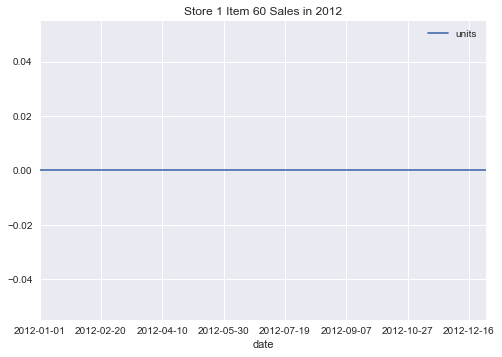

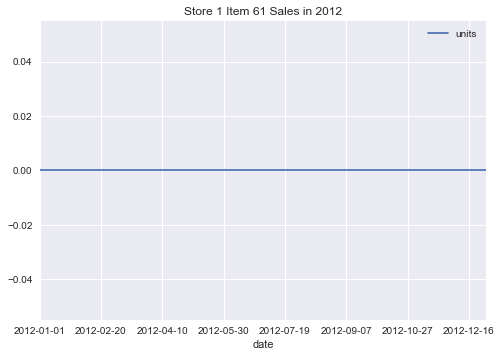

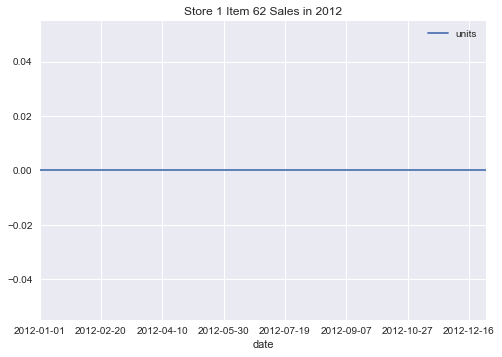

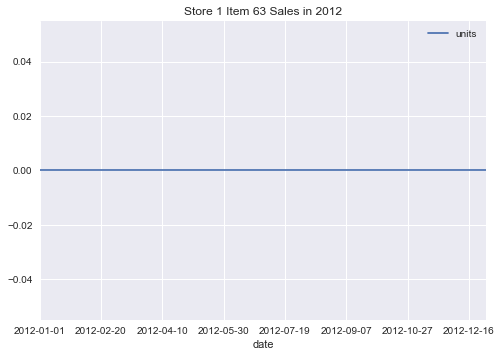

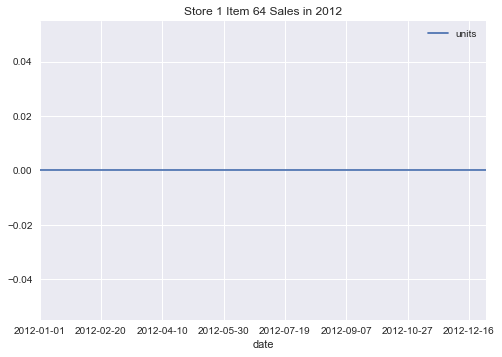

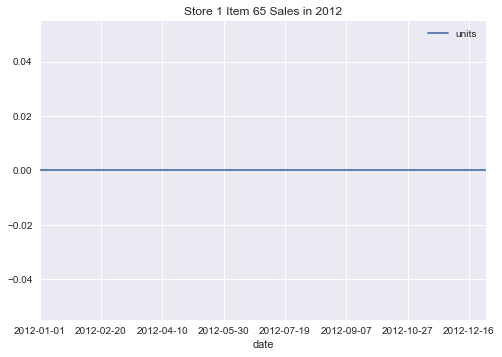

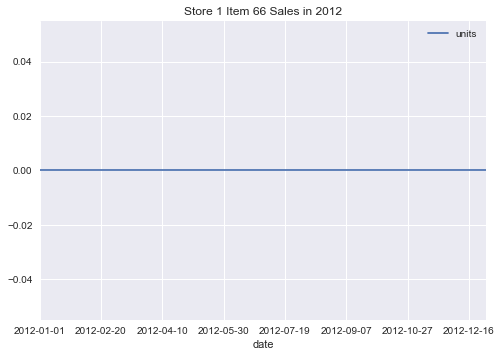

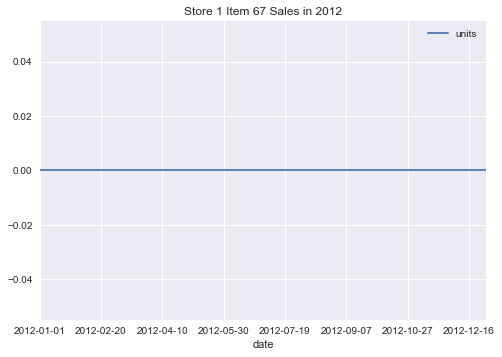

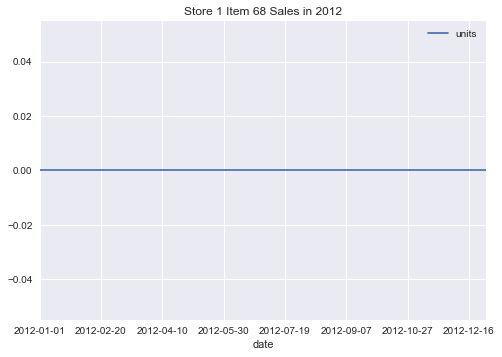

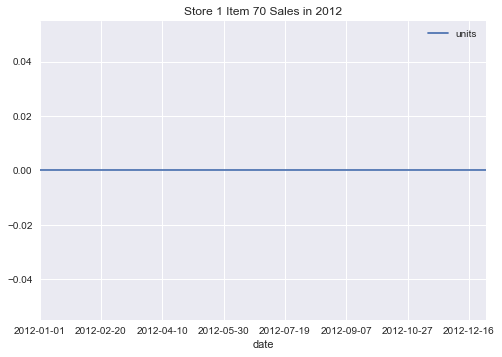

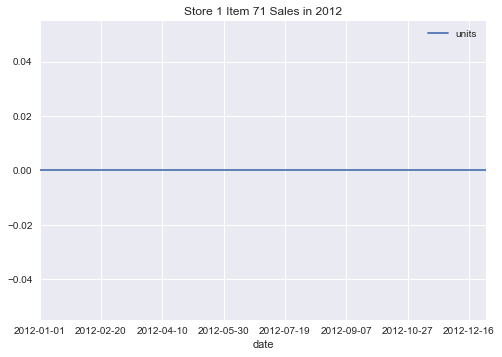

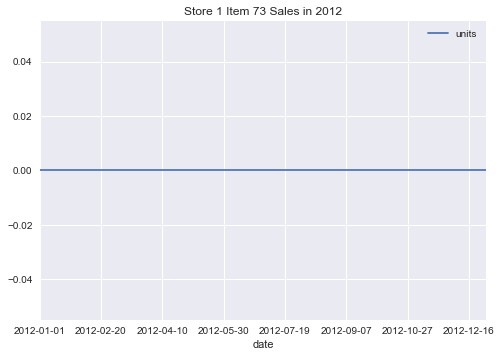

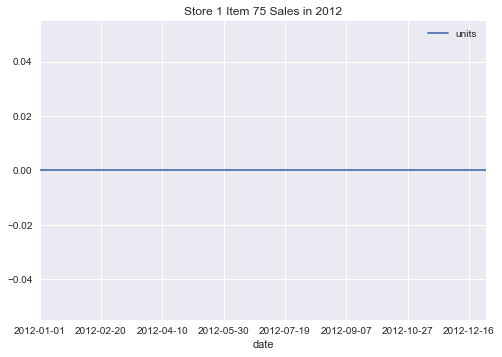

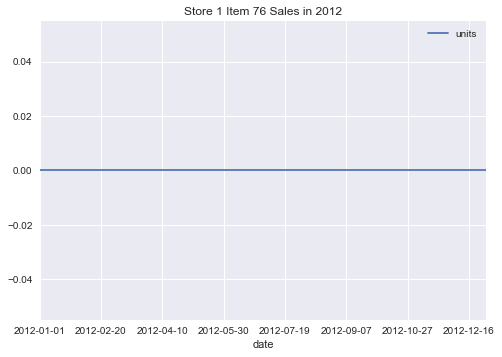

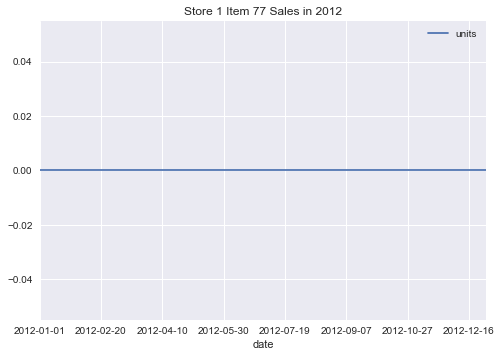

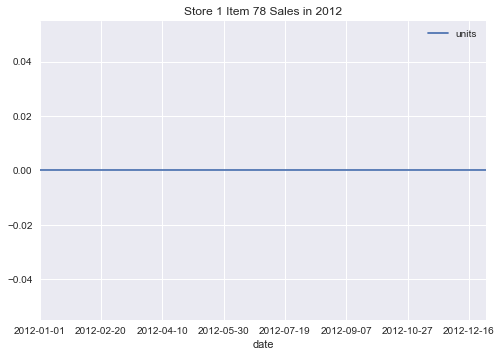

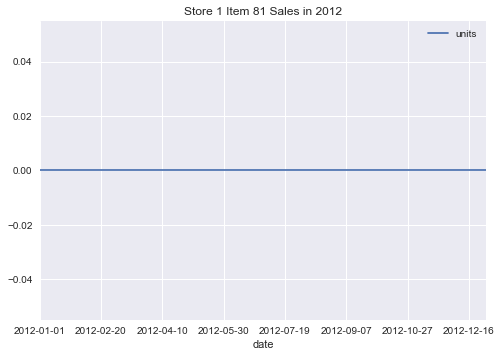

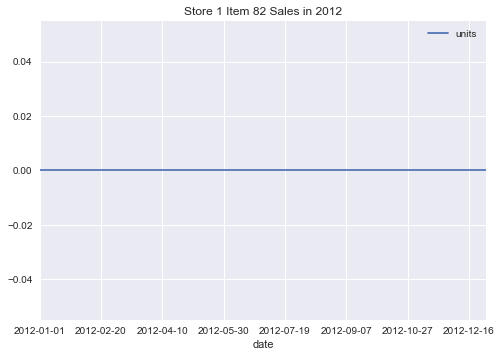

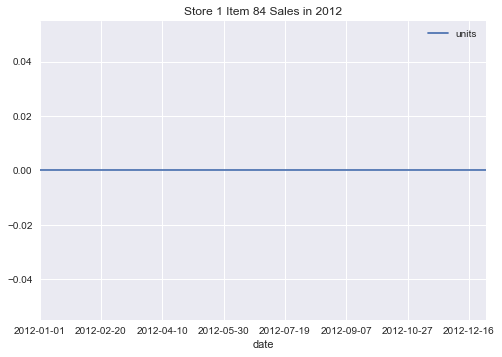

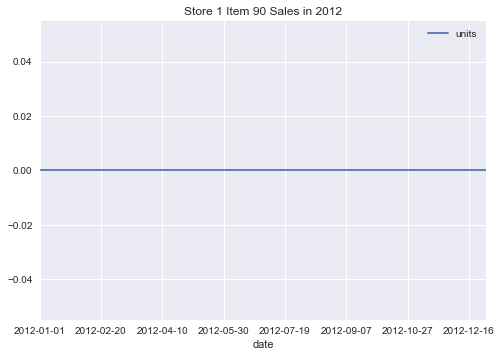

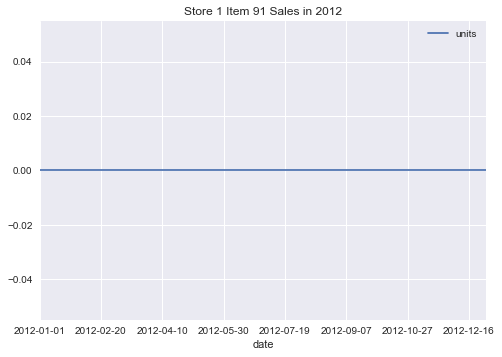

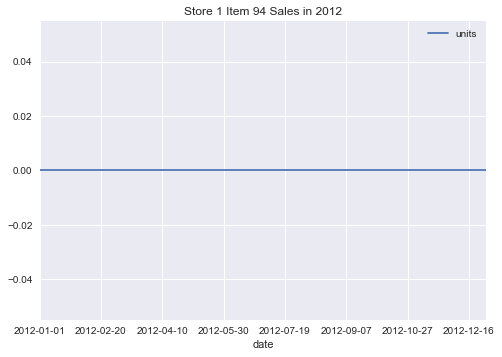

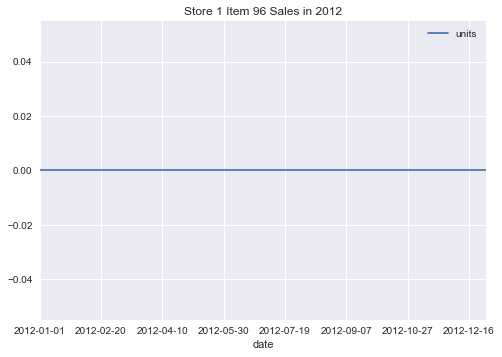

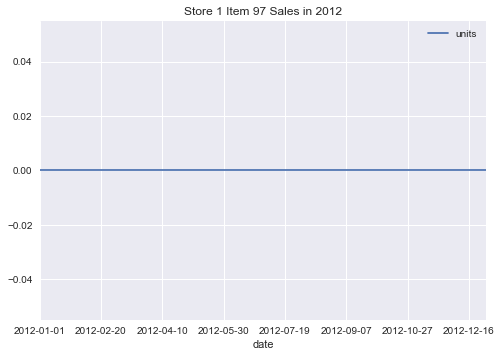

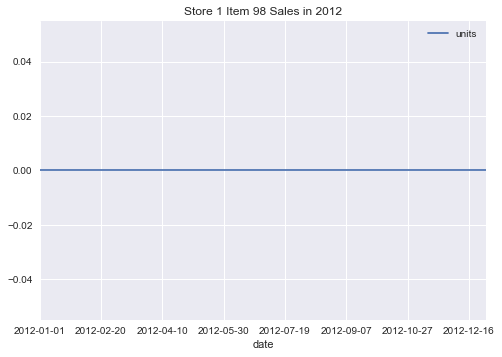

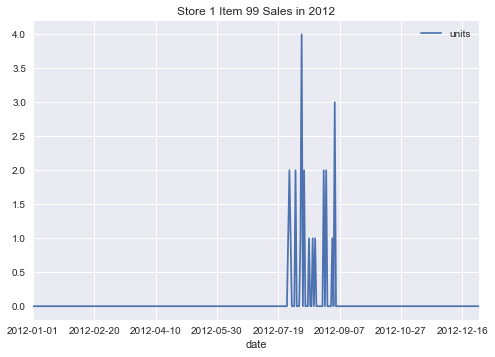

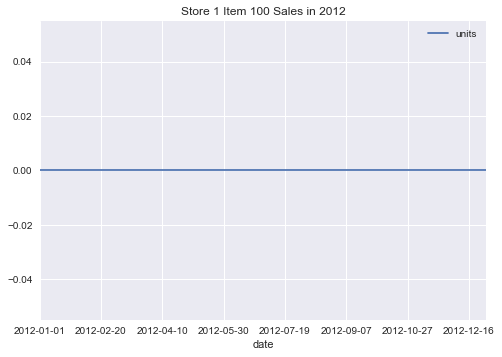

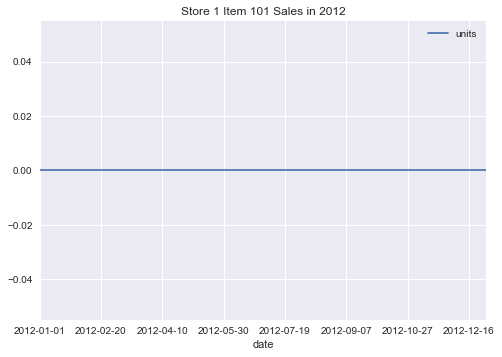

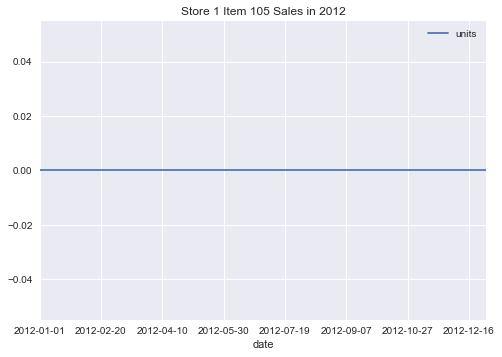

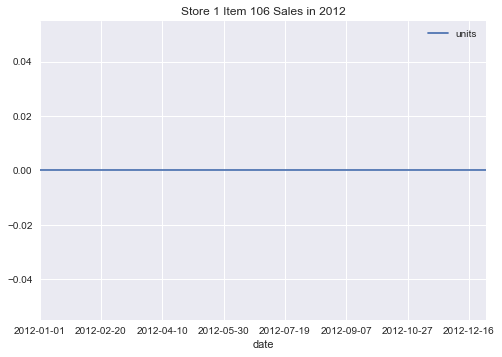

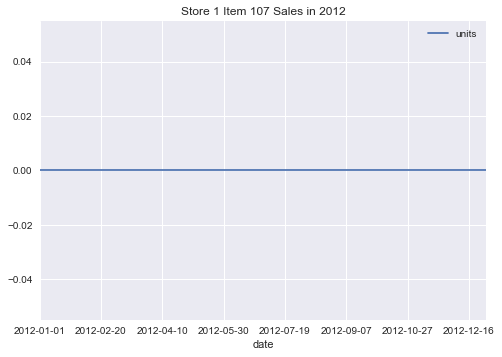

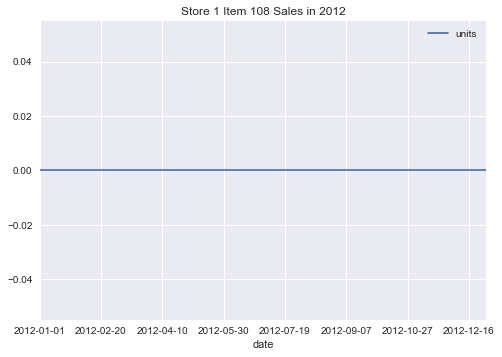

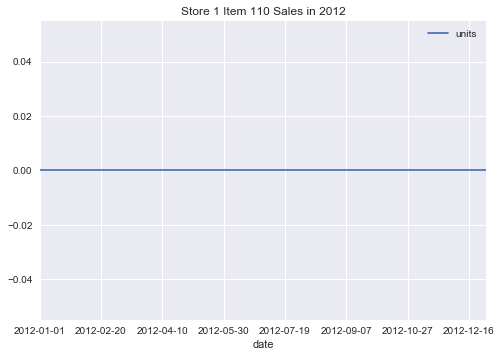

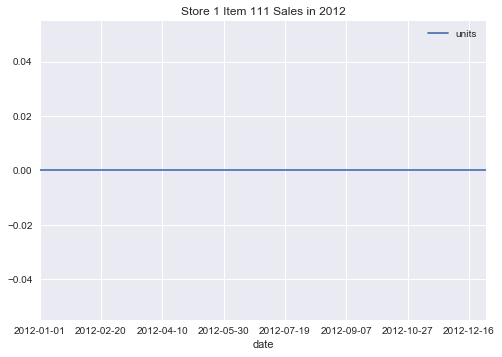

In [7]:
sales_train = pd.read_csv('data/train.csv')
clean_sales = sales_train.sort_values(by = ['store_nbr', 'date'])
s1sales = clean_sales.loc[clean_sales.store_nbr == 1]
for i in range(1,112):
    item = s1sales.loc[s1sales.item_nbr == i]
    mask = (item['date'] >= '2012-01-01') & (item['date'] < '2013-01-01')
    item_2012 = item.loc[mask]
    item_2012.plot(x='date', y='units', kind='line', title='Store 1 Item %.0f Sales in 2012' % i)
plt.show()

In [8]:
str_sales = clean_sales.loc[clean_sales.store_nbr == 1]
str_sales.drop(str_sales.columns[[1]], axis=1, inplace=True)
str_sales['date'] =  pd.to_datetime(str_sales['date'])
    
for i in range(1,112):
    str_item_mean = str_sales['units'].loc[str_sales.item_nbr == i].groupby([str_sales.item_nbr, str_sales.date.dt.year, str_sales.date.dt.month]).mean()
    print('Store 1')
    print(str_item_mean)
    print()

/Users/vpatel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vpatel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Store 1
item_nbr  date  date
1         2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
2         2012  1       0
     

Store 1
item_nbr  date  date
13        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
14        2012  1       0
     

Store 1
item_nbr  date  date
26        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
27        2012  1       0
     

Store 1
item_nbr  date  date
36        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
37        2012  1       0
     

Store 1
item_nbr  date  date
48        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
49        2012  1       0
     

Store 1
item_nbr  date  date
61        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
62        2012  1       0
     

Store 1
item_nbr  date  date
71        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
72        2012  1       0
     


Store 1
item_nbr  date  date
84        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
85        2012  1       0
    

Store 1
item_nbr  date  date
97        2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
98        2012  1       0
     

Store 1
item_nbr  date  date
108       2012  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2013  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
                11      0
                12      0
          2014  1       0
                2       0
                3       0
                4       0
                5       0
                6       0
                7       0
                8       0
                9       0
                10      0
Name: units, dtype: int64

Store 1
item_nbr  date  date
109       2012  1       0
     

After analyzing the above results for each item at store 1, it is evident that there are many items throughout different stores that have zero sales for the entire scope of the dataset. I will be removing these specific entries as they are not necessary for the model I will be deriving later.

In [9]:
sales_train2 = sales_train.replace(0, np.nan)
sales_train2.dropna(inplace=True)
clean_sales2 = sales_train2.sort_values(by = ['store_nbr', 'date'])

for s in clean_sales2.store_nbr.unique():
    str_sales = clean_sales2.loc[clean_sales2.store_nbr == s]
    str_sales.drop(str_sales.columns[[1]], axis=1, inplace=True)
    str_sales['date'] =  pd.to_datetime(str_sales['date'])

    for i in str_sales.item_nbr.unique():
        str_item_sum = str_sales['units'].loc[str_sales.item_nbr == i].groupby([str_sales.item_nbr, str_sales.date.dt.year, str_sales.date.dt.month]).sum()
        print('Store %0.0f' %s)
        print(str_item_sum)
        print()

/Users/vpatel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/vpatel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Store 1
item_nbr  date  date
9         2012  1       1169.0
                2       1438.0
                3        733.0
                4        724.0
                5        920.0
                6        735.0
                7        750.0
                8       1183.0
                9       1125.0
                10       964.0
                11      1146.0
                12      1149.0
          2013  1       1025.0
                2       1038.0
                3       1034.0
                4        956.0
                5       1020.0
                6        424.0
                7        426.0
                8        618.0
                9        590.0
                10       933.0
                11       481.0
                12       582.0
          2014  1       1011.0
                2        735.0
                3        697.0
                4        502.0
                5        600.0
                6        510.0
                7        252.0
          

Store 3
item_nbr  date  date
5         2012  1       2745.0
                2       2253.0
                3       1713.0
                4       2022.0
                5       1605.0
                6       1901.0
                7       2629.0
                8       2426.0
                9       2293.0
                10      2057.0
                11      2206.0
                12      2558.0
          2013  1       1667.0
                2       1490.0
                3       2368.0
                4        817.0
                5       1593.0
                6        572.0
                7        548.0
                8       1211.0
                9       1157.0
                10      1271.0
                11      1931.0
                12      2112.0
          2014  1       1766.0
                2       1665.0
                3       1521.0
                4       1201.0
                5        878.0
                6       1222.0
                7        996.0
          

Store 5
item_nbr  date  date
93        2012  1        10.0
                2        45.0
                3        96.0
                4        63.0
                5       165.0
                6       254.0
                7        47.0
                8       125.0
                9       189.0
                10       65.0
                11       66.0
                12       85.0
          2013  1        75.0
                2        35.0
Name: units, dtype: float64

Store 5
item_nbr  date  date
105       2013  5        3.0
                6        8.0
                7        8.0
                8       16.0
                9       16.0
                10       7.0
                11      10.0
                12      16.0
          2014  1        7.0
                2        2.0
                3        7.0
Name: units, dtype: float64

Store 6
item_nbr  date  date
9         2012  1       1460.0
                2       1252.0
                3       1339.0
                4      

Name: units, dtype: float64

Store 10
item_nbr  date  date
5         2012  1       2211.0
                2       2036.0
                3       1637.0
                4       2021.0
                5       1810.0
                6       1795.0
                7       2430.0
                8       2481.0
                9       2233.0
                10      2133.0
                11      2429.0
                12      2098.0
          2013  1       2180.0
                2       2621.0
                3       2794.0
                4       1417.0
                5       1665.0
                6       1294.0
                7       1521.0
                8       2043.0
                9       1854.0
                10      1985.0
                11      1739.0
                12      2054.0
          2014  1       1236.0
                2       1486.0
                3       1530.0
                4       1495.0
                5       1661.0
                6       1734.0
           

Store 13
item_nbr  date  date
5         2012  1       4247.0
                2       2310.0
                3       2771.0
                4       2497.0
                5       2703.0
                6       2781.0
                7       2708.0
                8       2835.0
                9       2570.0
                10      2588.0
                11      2203.0
                12      2313.0
          2013  1       2396.0
                2       1784.0
                3       1628.0
                4       1207.0
                5        983.0
                6       1912.0
                7       2351.0
                8       2065.0
                9        784.0
                10      1265.0
                11      1640.0
                12      2139.0
          2014  1       1925.0
                2       1558.0
                3       1544.0
                4       1190.0
                5        690.0
                6       1258.0
                7       1965.0
         


Store 16
item_nbr  date  date
16        2012  1       1137.0
                2       1367.0
                3       1275.0
                4       1064.0
                5       1073.0
                6       1081.0
                7       1047.0
                8       1237.0
                9       1420.0
                10      1506.0
                11      1097.0
                12      1407.0
          2013  1       1456.0
                2       1245.0
                3        883.0
                4        752.0
                5        557.0
                6        351.0
                7        606.0
                8        616.0
                9        551.0
                10       613.0
                11       588.0
                12       567.0
          2014  1        517.0
                2        230.0
                3        464.0
                4        345.0
                5        532.0
                6        609.0
                7        394.0
        


Store 19
item_nbr  date  date
16        2012  1       661.0
                2       621.0
                3       760.0
                4       416.0
                5       458.0
                6       577.0
                7       436.0
                8       468.0
                9       670.0
                10      679.0
                11      574.0
                12      729.0
          2013  1       854.0
                2       701.0
                3       500.0
                4       418.0
                5       442.0
                6       285.0
                7       361.0
                8       542.0
                9       359.0
                10      600.0
                11      378.0
                12      367.0
          2014  1       252.0
                2       177.0
                3       225.0
                4       367.0
                5       404.0
                6       261.0
                7       416.0
                8       567.0
         

Store 22
item_nbr  date  date
9         2012  1       2307.0
                2       2022.0
                3       1619.0
                4       1643.0
                5       1953.0
                6       1849.0
                7       1631.0
                8       1596.0
                9       1387.0
                10      1619.0
                11      1536.0
                12      1587.0
          2013  1       1582.0
                2       1183.0
                3       1700.0
                4       1081.0
                5        792.0
                6        305.0
                7        543.0
                8       1162.0
                9       1013.0
                10      1109.0
                11       760.0
                12       885.0
          2014  1        798.0
                2        900.0
                3        610.0
                4       1099.0
                5        986.0
                6       1308.0
                7        711.0
         

Store 25
item_nbr  date  date
9         2012  1       3382.0
                2       3633.0
                3       3348.0
                4       3043.0
                5       2539.0
                6       2877.0
                7       2602.0
                8       2706.0
                9       3187.0
                10      3550.0
                11      2972.0
                12      4458.0
          2013  1       3110.0
                2       3294.0
                3       4447.0
                4       3365.0
                5       2742.0
                6       3120.0
                7       2335.0
                8       2257.0
                9       2160.0
                10      3031.0
                11      2699.0
                12      2964.0
          2014  1       3201.0
                2       2564.0
                3       2436.0
                4       2090.0
                5       2210.0
                6       2135.0
                7       1668.0
         


Store 28
item_nbr  date  date
5         2012  1       1648.0
                2       1434.0
                3       1527.0
                4       1373.0
                5       1506.0
                6       1322.0
                7       1593.0
                8       1191.0
                9       1177.0
                10      1078.0
                11       848.0
                12      1308.0
          2013  1       1120.0
                2       1130.0
                3        909.0
                4        341.0
                5        754.0
                6        508.0
                7        492.0
                8        835.0
                9        821.0
                10       650.0
                11       887.0
                12      1000.0
          2014  1       1164.0
                2       1052.0
                3       1005.0
                4        866.0
                5        391.0
                6        680.0
                7        422.0
        

Store 31
item_nbr  date  date
9         2012  1       1774.0
                2       1831.0
                3       1347.0
                4       1137.0
                5       1425.0
                6       1535.0
                7       1636.0
                8       1518.0
                9       1562.0
                10      1708.0
                11      1661.0
                12      1577.0
          2013  1       1575.0
                2       1428.0
                3       1507.0
                4       1505.0
                5       1071.0
                6       1121.0
                7       1442.0
                8       1777.0
                9        994.0
                10      1624.0
                11      1487.0
                12      1929.0
          2014  1       1983.0
                2       1517.0
                3       1663.0
                4       1113.0
                5       1005.0
                6       1233.0
                7        956.0
         

item_nbr  date  date
93        2012  2        7.0
                3       26.0
                4       14.0
                5       18.0
                6       24.0
                7       22.0
                8       18.0
                9       57.0
                10      39.0
                11      29.0
                12      19.0
          2013  1       48.0
                2        7.0
Name: units, dtype: float64

Store 34
item_nbr  date  date
9         2012  1       1553.0
                2       1378.0
                3       1350.0
                4       1376.0
                5       1491.0
                6       1580.0
                7       1423.0
                8       1947.0
                9       1736.0
                10      1706.0
                11      1553.0
                12      1888.0
          2013  1       2076.0
                2       1613.0
                3       1610.0
                4       1357.0
                5       1252.0
                

Name: units, dtype: float64

Store 37
item_nbr  date  date
5         2012  1       2079.0
                2       1876.0
                3       1572.0
                4       1629.0
                5       1385.0
                6       1542.0
                7       1375.0
                8       1331.0
                9       1312.0
                10      1218.0
                11      6775.0
                12      1418.0
          2013  1       1355.0
                2        880.0
                3       1134.0
                4       1242.0
                5       1138.0
                6       1165.0
                7        960.0
                8        790.0
                9        734.0
                10      1228.0
                11      4479.0
                12      1131.0
          2014  1       1564.0
                2       1084.0
                3       1078.0
                4        949.0
                5        878.0
                6        994.0
           

Store 40
item_nbr  date  date
5         2012  1       2590.0
                2       1954.0
                3       1920.0
                4       1877.0
                5       1675.0
                6       1695.0
                7       1716.0
                8       1524.0
                9       1443.0
                10      1436.0
                11      1440.0
                12      1599.0
          2013  1       1558.0
                2       1269.0
                3       1286.0
                4       1202.0
                5       1249.0
                6       1249.0
                7       1234.0
                8        962.0
                9        815.0
                10      1508.0
                11      1211.0
                12      1566.0
          2014  1       1522.0
                2       1376.0
                3       1390.0
                4       1138.0
                5       1313.0
                6       1306.0
                7       1156.0
         

Name: units, dtype: float64

Store 43
item_nbr  date  date
16        2012  1       1803.0
                2       1718.0
                3       1628.0
                4       1403.0
                5       1167.0
                6       1907.0
                7       1735.0
                8       2017.0
                9       1717.0
                10      1607.0
                11      1043.0
                12      1627.0
          2013  1       1715.0
                2       1283.0
                3        956.0
                4        953.0
                5        650.0
                6        760.0
                7        815.0
                8       1119.0
                9       1048.0
                10       988.0
                11       826.0
                12      1151.0
          2014  1        517.0
                2       1309.0
                3        917.0
                4        393.0
                5        574.0
                6        733.0
           

The output above shows total monthly sales of items for each store. With this we can get a better idea of seasonal sales trends for each item. The following items from respective stores have seasonal trends:
- Store 1, Item 51: Winter
- Store 1, Item 40: Winter
- Store 1, Item 93: Spring, Summer, Fall
- Store 1, Item 89: Summer and Fall
- Store 3, Item 2: Spring
- Store 4, Item 97: Winter
- Store 4, Item 96: Winter
- Store 8, Item 84: Fall
- Store 12, Item 93: Spring, Summer, Fall
- Store 13, Item 104: Winter
- Store 14, Item 50: Winter
- Store 14, Item 15: Winter
- Store 15, Item 49: Fall and Winter
- Store 15, Item 93: Summer
- Store 15, Item 15: Winter
- Store 16, Item 39: Winter
- Store 16, Item 50: Fall and Winter
- Store 19, Item 39: Winter
- Store 19, Item 93: Summer and Fall
- Store 19, Item 88: Summer and Fall
- Store 19, Item 15: Winter
- Store 24, Item 97: Winter
- Store 25, Item 50: Fall and Winter
- Store 25, Item 93: Summer
- Store 30, Item 49: Winter
- Store 35, Item 49: Winter
- Store 37, Item 15: Winter
- Store 37, Item 105: Summer
- Store 45, Item 50: Winter